<a href="https://colab.research.google.com/github/quickgrid/CodeLab/blob/master/courses/Atcold__pytorch-Deep-Learning/00_logic_neuron_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Looking back it seems like tuple or loops were better choice for the functions. Reason is unnecessary list conversions multiple times such as,**

```
or_neuron([and_neuron([x[0], not_neuron([x[1]])]), and_neuron([not_neuron([x[0]]), x[1]])])
```

# Code your own neuron and neural net
The parts of code that look like
```python
pass  # ⬅️✏️
```
need to be filled in before moving to the next cell.

Check out the slides and / or corresponding video lecture for more instructions.

In [3]:
import numpy as np

In [31]:
# Define two vectors (lists): input my_x, weights my_w
my_x = [0, 1, 1]
my_w = [-10, 10, 5]

In [32]:
# Multiply two lists element wise
def mul(a, b):
    """
    return a list c, same length as a, element c[i] = a[i] * b[i]
    "len(list)" and "[0] * n" may be useful
    """
    #pass  # ⬅️✏️

    if len(a) != len(b):
      raise Exception("ERROR shapes don't match")

    n = len(a)
    c = np.ndarray(shape=(n), dtype=float)
    for i in range(n):
      c[i] = a[i] * b[i]
    return c

---

In [33]:
# Test mul() function
mul(my_x, my_w)

array([ 0., 10.,  5.])

In [18]:
# Define a scalar: bias b
my_b = -5

In [23]:
# Neuron linear (internal) potential
def linear_neuron(x, weights, bias):
    """
    return a scalar value representing a scalar neuron
    "sum(list)" computes the sum of the elements in a list
    """
    #pass  # ⬅️✏️

    wx = mul(x, weights)
    return sum(wx) + bias

---

In [24]:
# Test linear_neuron() function
linear_neuron(my_x, my_w, my_b)

10.0

In [35]:
# Import exp() function (safe on lists)
from numpy import exp

In [39]:
# Logistic sigmoid
def sigmoid(z):
    """
    return the logistic sigmoid (use exp())
    """
    #pass  # ⬅️✏️

    return 1 / (1 + exp(-z)) 

---

In [40]:
# Try out σ() for different z values
for z in (-5, 0, 5): print(sigmoid(z))

0.0066928509242848554
0.5
0.9933071490757153


In [41]:
# Import some plotting stuff to graph sigmoid()
from numpy import linspace
from matplotlib.pyplot import plot, axhline, axvline, grid, style
style.use('dark_background')

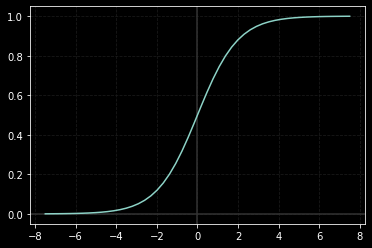

In [44]:
# Get a pair of axis and grid lines centred in (0, 0)
axhline(c='.2'); axvline(color='.2')
grid(c='.1', ls='--')

# Plot across a span of numbers
z = linspace(-7.5, 7.5)
plot(z, sigmoid(z));

In [45]:
# Full neuron function
def neuron(x, weights, bias):
    """
    Return a classical neuron output (reuse code above)
    """
    #pass  # ⬅️✏️
    return linear_neuron(x, weights, bias)

---

In [46]:
# Test neuron() function
neuron(my_x, my_w, my_b)

10.0

In [56]:
# Package OR neuron weights and bias
def or_neuron(x):
    """
    Return x1 OR x2 (x1 + x2)
    """
    #pass  # ⬅️✏️
    
    if len(x) != 2:
      raise Exception("Function designed for tuple with two values")

    return x[0] | x[1]

---

In [48]:
# Defina a collection of inputs to test OR and AND
my_x_collection = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]

In [57]:
print('Checking OR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{or_neuron(my_x):.3f}')

Checking OR neuron output
[0, 0] 0.000
[0, 1] 1.000
[1, 0] 1.000
[1, 1] 1.000


In [54]:
# Package AND neuron weights and bias
def and_neuron(x):
    """
    Return x1 AND x2 (x1 * x2)
    """
    #pass  # ⬅️✏️

    if len(x) != 2:
      raise Exception("Function designed for tuple with two values")

    return x[0] & x[1]

---

In [55]:
print('Checking AND neuron output')
for my_x in my_x_collection:
    print(my_x, f'{and_neuron(my_x):.3f}')

Checking AND neuron output
[0, 0] 0.000
[0, 1] 0.000
[1, 0] 0.000
[1, 1] 1.000


In [72]:
# Package NOT neuron weight and bias
def not_neuron(x):
    """
    Return NOT x1 (x1_)
    """
    #pass  # ⬅️✏️

    return 0 if x[0] else 1

---

In [73]:
print('Checking NOT neuron output')
for my_x in [[0], [1]]:
    print(my_x, f'{not_neuron(my_x):.3f}')

Checking NOT neuron output
[0] 1.000
[1] 0.000


![X-OR](https://github.com/Atcold/pytorch-Deep-Learning/blob/master/res/x-or_circuit.png?raw=1)

In [78]:
# Combine OR, AND, and NOT into a XOR neuron
def xor_neuron(x):
    """
    Return x1_ * x2 + x1 * x2_
    """
    #pass  # ⬅️✏️

    return or_neuron([and_neuron([x[0], not_neuron([x[1]])]), and_neuron([not_neuron([x[0]]), x[1]])])

---

In [79]:
print('Checking XOR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{xor_neuron(my_x):.3f}')

Checking XOR neuron output
[0, 0] 0.000
[0, 1] 1.000
[1, 0] 1.000
[1, 1] 0.000


![Half-adder](https://github.com/Atcold/pytorch-Deep-Learning/blob/master/res/half-adder_circuit.png?raw=1)

In [81]:
# Combine a XOR and an AND into a half-adder
# ⬅️✏️

def half_adder(x):
  return xor_neuron(x), and_neuron(x)



In [83]:
print('Checking XOR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{half_adder(my_x)}')

Checking XOR neuron output
[0, 0] (0, 0)
[0, 1] (1, 0)
[1, 0] (1, 0)
[1, 1] (0, 1)


---

![Adder](https://github.com/Atcold/pytorch-Deep-Learning/blob/master/res/adder_circuit.png?raw=1)

In [95]:
# Combine two half-adders and an OR into a (full) adder
# ⬅️✏️

def full_adder(x, Cin):
  s1, c1 = half_adder(x)
  s2, c2 = half_adder([s1, Cin])
  return s2, or_neuron([c2, c1])

In [96]:
print('Checking XOR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{full_adder(my_x, 0)}')

Checking XOR neuron output
[0, 0] (0, 0)
[0, 1] (1, 0)
[1, 0] (1, 0)
[1, 1] (0, 1)


In [94]:
print('Checking XOR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{full_adder(my_x, 1)}')

Checking XOR neuron output
[0, 0] (1, 0)
[0, 1] (0, 1)
[1, 0] (0, 1)
[1, 1] (1, 1)


---